In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# import hvplot.pandas

In [2]:
data = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")
data.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238859078,01/09/2022,NaN,(null),NaN,(null),PL 2650022,M,B,49,0,25-44,M,BLACK HISPANIC,1021536,251417,40.856680,-73.865212,POINT (-73.865212 40.85668)
1,239923883,01/31/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,BLACK,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
2,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)


In [3]:
new = data.dropna()
new.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
2,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
3,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,18-24,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
4,241038267,02/22/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,41,0,45-64,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


In [4]:
new_data = new.drop(columns=["PD_CD", "KY_CD", "PD_DESC", "LAW_CODE","PERP_SEX",
                              "ARREST_BORO", "ARREST_PRECINCT", "JURISDICTION_CODE",
                              "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude",
                               "New Georeferenced Column"])
new_data.head(3)

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,AGE_GROUP,PERP_RACE
2,239651234,01/25/2022,RAPE,F,25-44,BLACK
3,241524225,03/03/2022,RAPE,F,18-24,BLACK
4,241038267,02/22/2022,RAPE,F,45-64,BLACK


In [5]:
new_nypd_data = new_data.rename(columns = {"ARREST_KEY": "Arrest Key",
                                           "ARREST_DATE": "Arrest Date",
                                           "OFNS_DESC": "Offense Desc",
                                           "LAW_CAT_CD": "Offense Cat",
                                           "AGE_GROUP": "Age Group",
                                           "PERP_RACE": "Perp Race"
                                          })

In [6]:
new_nypd_data = new_nypd_data.replace({"HARRASSMENT 2": "HARASSMENT","ESCAPE 3": "ESCAPE",
"THEFT OF SERVICES": "THEFT","THEFT-FRAUD": "THEFT","OTHER TRAFFIC INFRACTION": "VEHICLE AND TRAFFIC LAWS",
"ASSAULT 3 & RELATED OFFENSES": "ASSAULT 3","CRIMINAL MISCHIEF & RELATED OF": "CRIMINAL MISCHIEF",
"OFF. AGNST PUB ORD SENSBLTY &": 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
"OTHER STATE LAWS (NON PENAL LA": "OTHER STATE LAWS (NON PENAL LAW)",
"ENDAN WELFARE INCOMP": "ENDANGERING WELFARE OF INCOMPETENT",
"AGRICULTURE & MRKTS LAW-UNCLASSIFIED": "AGRICULTURE & MARKETS LAW",
"DISRUPTION OF A RELIGIOUS SERV": "DISRUPTION OF A RELIGIOUS SERVICE",
"LOITERING/GAMBLING (CARDS, DIC": "GAMBLING","OFFENSES AGAINST MARRIAGE UNCL": "OFFENSES AGAINST MARRIAGE",
"HOMICIDE-NEGLIGENT,UNCLASSIFIE": "HOMICIDE-NEGLIGENT","HOMICIDE-NEGLIGENT-VEHICLE": "HOMICIDE-NEGLIGENT",
"I": "Violation", "V": "Violation","F": "Felony","M": "Misdemeanor"}).copy()
new_nypd_data.head(3)

,Arrest Key,Arrest Date,Offense Desc,Offense Cat,Age Group,Perp Race
2,239651234,01/25/2022,RAPE,Felony,25-44,BLACK
3,241524225,03/03/2022,RAPE,Felony,18-24,BLACK
4,241038267,02/22/2022,RAPE,Felony,45-64,BLACK


In [7]:
new_nypd_data['Arrest Date'] = pd.to_datetime(new_nypd_data['Arrest Date'])
new_nypd_data['Month'] = new_nypd_data['Arrest Date'].dt.month_name().str[:3]
new_nypd_data.head(3)

,Arrest Key,Arrest Date,Offense Desc,Offense Cat,Age Group,Perp Race,Month
2,239651234,2022-01-25,RAPE,Felony,25-44,BLACK,Jan
3,241524225,2022-03-03,RAPE,Felony,18-24,BLACK,Mar
4,241038267,2022-02-22,RAPE,Felony,45-64,BLACK,Feb


In [8]:
offense = new_nypd_data["Offense Desc"].value_counts()
offense = offense.iloc[:10].sort_values(ascending = True)

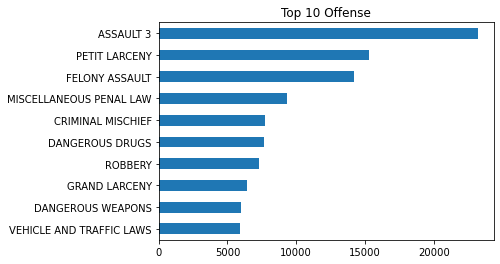

In [9]:
offense.plot(kind = "barh",title = "Top 10 Offense")
plt.savefig("output/Fig1.png")

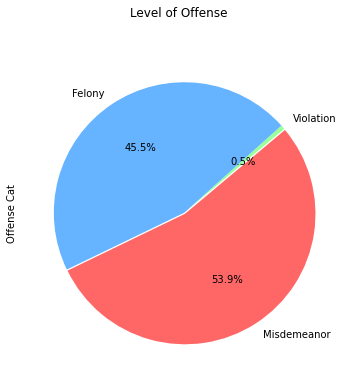

In [10]:
level_of_offense = new_nypd_data["Offense Cat"].value_counts().sort_values()
level_of_offense.plot(kind="pie",subplots=True, explode = [0, 0, 0.01], 
                    shadow = False, startangle=40, figsize=(6,6),autopct="%1.1f%%",
                    title = 'Level of Offense', colors = ["#99ff99","#66b3ff","#ff6666"])
plt.savefig("output/Fig2.png")

In [11]:
date_df = pd.DataFrame({"Arrest Month": new_nypd_data["Month"],
                          "Offense": new_nypd_data["Offense Cat"]})

date_df.head(3)

,Arrest Month,Offense
2,Jan,Felony
3,Mar,Felony
4,Feb,Felony


In [12]:
arrests_count = date_df["Arrest Month"].value_counts().tolist()
arrests_month =date_df["Arrest Month"].unique().tolist()
arrest_df = pd.DataFrame({"Month": arrests_month,
                      "Num of Arrests":arrests_count})
arrest_df.head(3)

,Month,Num of Arrests
0,Jan,16712
1,Mar,16378
2,Feb,16175


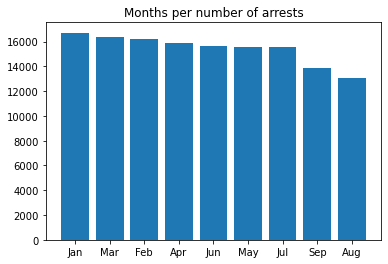

In [13]:
x_axis = arrest_df["Month"]
y_axis = arrest_df["Num of Arrests"]
plt.bar(x_axis, y_axis)
plt.title("Months per number of arrests")
plt.savefig("output/Fig3.png")
plt.show()

In [14]:
mis_df = date_df.loc[date_df["Offense"] == "Misdemeanor"]
fel_df = date_df.loc[date_df["Offense"] == "Felony"]
viol_df = date_df.loc[date_df["Offense"] == "Violation"]

In [15]:
mis_count = mis_df["Arrest Month"].value_counts().tolist()
mis_month = mis_df["Arrest Month"].unique().tolist()
mis_df = pd.DataFrame({"Month": mis_month,
                      "Mis Count":mis_count})

In [16]:
fel_count = fel_df["Arrest Month"].value_counts().tolist()
fel_month = fel_df["Arrest Month"].unique().tolist()
fel_df = pd.DataFrame({"Month": fel_month,
                      "Fel Count":fel_count})

In [17]:
viol_count = viol_df["Arrest Month"].value_counts().tolist()
viol_month = viol_df["Arrest Month"].unique().tolist()
vio_df = pd.DataFrame({"Month": viol_month,
                      "Viol Count":viol_count})

In [18]:
mis_fel_comb = pd.merge(mis_df, fel_df, on="Month", how = "outer")

In [19]:
combined_df = pd.merge(mis_fel_comb, vio_df, on="Month", how = "outer")

In [24]:
new_combined_df = combined_df.set_index('Month')
new_combined_df

,Mis Count,Fel Count,Viol Count
Month,,,
Feb,9226,7386,95
Mar,8856,7391,81
Jun,8731,6297,56
Apr,8700,7370,87
Jan,8434,7414,108
May,8350,7120,78
Jul,8142,7109,77
Aug,7524,6063,74
Sep,6918,7062,74


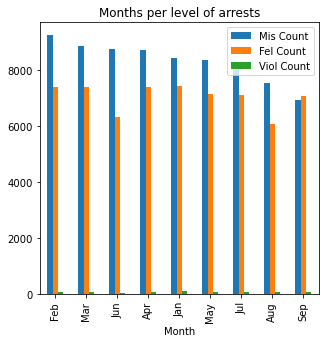

In [32]:
combined_df.plot(x="Month", y=["Mis Count", "Fel Count", "Viol Count"],
        kind="bar", figsize=(5, 5), title = "Months per level of arrests")
plt.savefig("output/Fig4.png")
plt.show()

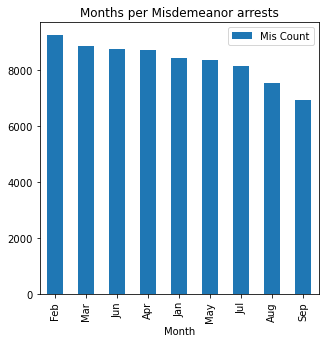

In [38]:
combined_df.plot(x="Month", y=["Mis Count"],
        kind="bar", figsize=(5, 5), title = "Months per Misdemeanor arrests")
plt.savefig("output/Fig5.png")
plt.show()

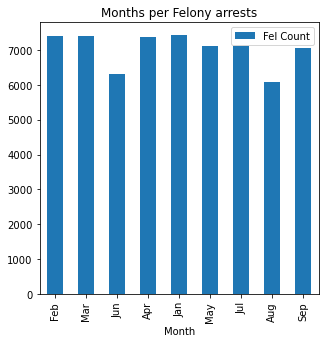

In [37]:
combined_df.plot(x="Month", y=["Fel Count"],
        kind="bar", figsize=(5, 5), title = "Months per Felony arrests")
plt.savefig("output/Fig6.png")
plt.show()

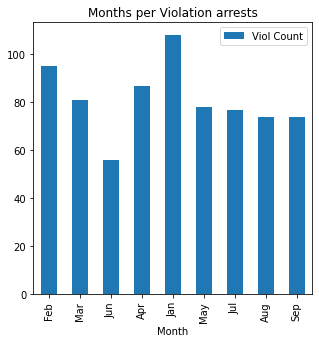

In [36]:
combined_df.plot(x="Month", y=["Viol Count"],
        kind="bar", figsize=(5, 5), title = "Months per Violation arrests")
plt.savefig("output/Fig7.png")
plt.show()

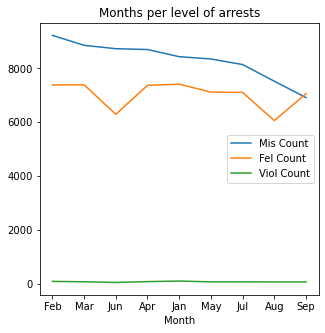

In [22]:
combined_df.plot(x="Month", y=["Mis Count", "Fel Count", "Viol Count"],
        kind="line", figsize=(5, 5), title = "Months per level of arrests")
plt.savefig("output/Fig5.png")
plt.show()

In [26]:
# mis.astype('int').plot(kind = "bar")
# fel.astype('int').plot(kind = "bar")
# viol.astype('int').plot(kind = "bar")
# plt.savefig("output/Fig4.png")
# plt.legend(loc='best')
# plt.show()

In [27]:
# mis.plot(kind = "bar")
# plt.savefig("output/Fig5.png")
# plt.show()

In [28]:
# fel.plot(kind = "bar")
# plt.savefig("output/Fig6.png")
# plt.show()

In [29]:
# viol.plot(kind = "bar")
# plt.savefig("output/Fig7.png")
# plt.show()